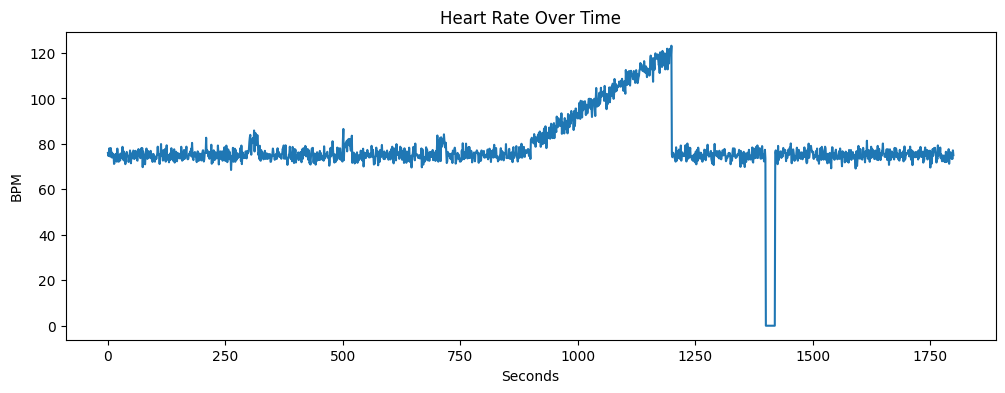

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/generated/patient_01.csv")

plt.figure(figsize=(12,4))
plt.plot(df["heart_rate"])
plt.title("Heart Rate Over Time")
plt.xlabel("Seconds")
plt.ylabel("BPM")
plt.show()


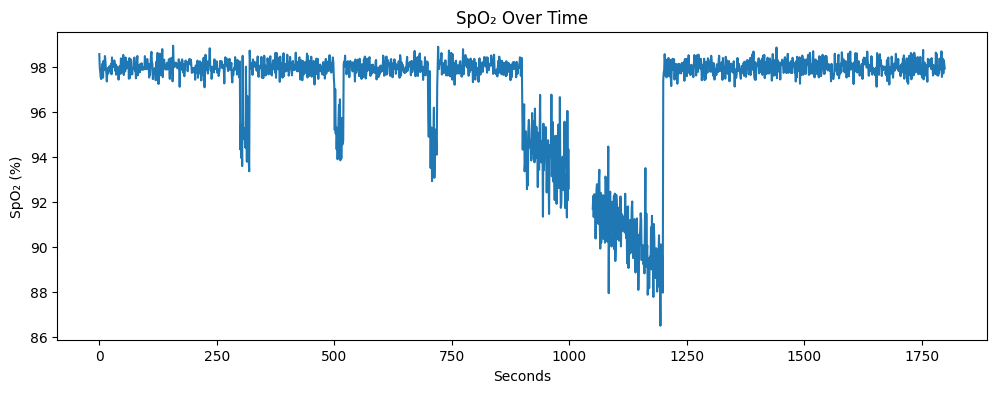

In [4]:
plt.figure(figsize=(12,4))
plt.plot(df["spo2"])
plt.title("SpO₂ Over Time")
plt.xlabel("Seconds")
plt.ylabel("SpO₂ (%)")
plt.show()


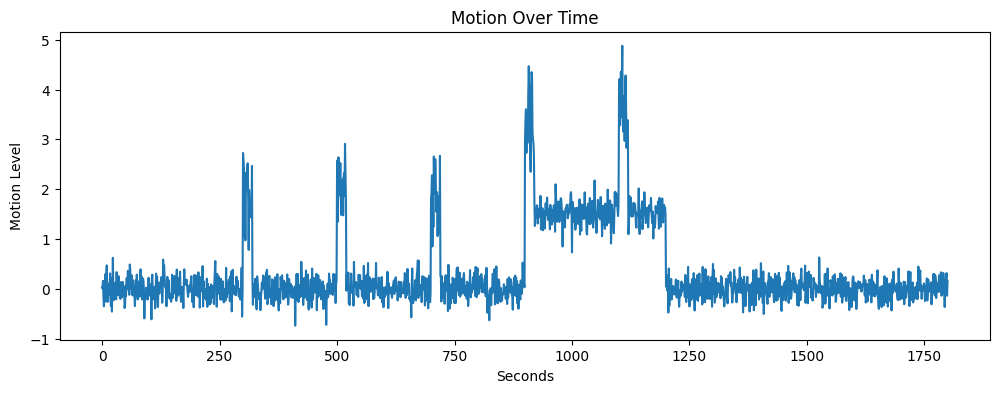

In [5]:
plt.figure(figsize=(12,4))
plt.plot(df["motion"])
plt.title("Motion Over Time")
plt.xlabel("Seconds")
plt.ylabel("Motion Level")
plt.show()


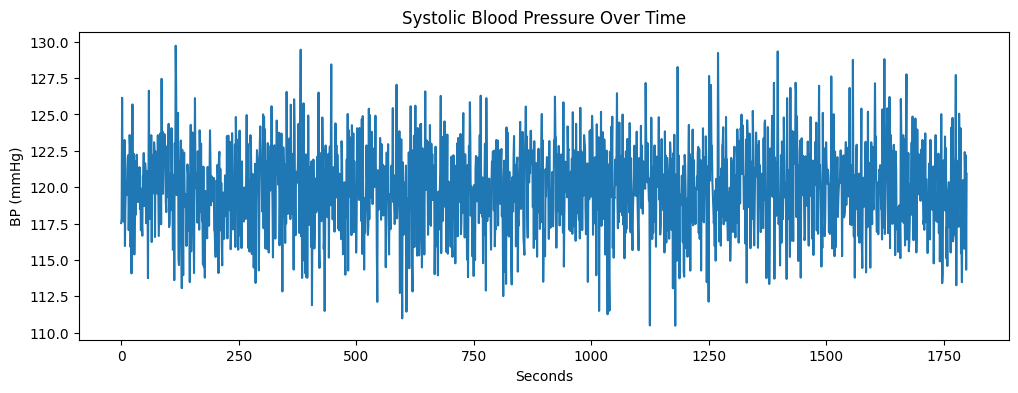

In [6]:
plt.figure(figsize=(12,4))
plt.plot(df["systolic_bp"])
plt.title("Systolic Blood Pressure Over Time")
plt.xlabel("Seconds")
plt.ylabel("BP (mmHg)")
plt.show()


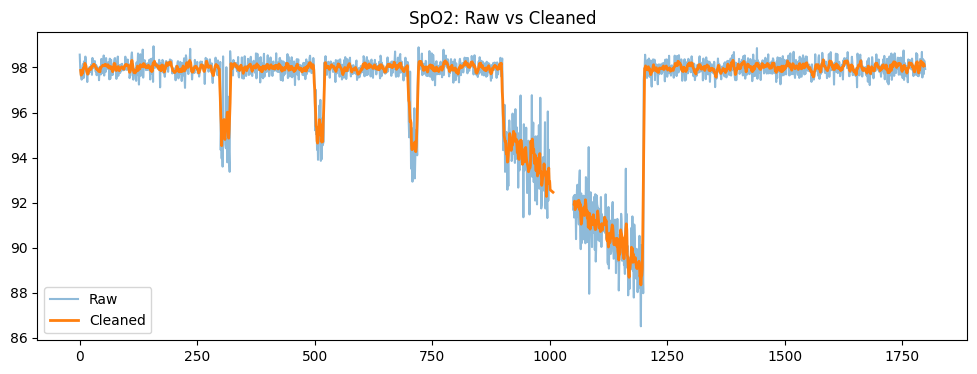

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

raw = pd.read_csv("../data/generated/patient_01.csv")
clean = pd.read_csv("../data/generated/patient_01_cleaned.csv")

plt.figure(figsize=(12,4))
plt.plot(raw["spo2"], label="Raw", alpha=0.5)
plt.plot(clean["spo2"], label="Cleaned", linewidth=2)
plt.title("SpO2: Raw vs Cleaned")
plt.legend()
plt.show()


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from pathlib import Path

# -----------------------
# Load ALL labeled patient data
# -----------------------
data_dir = Path("../data/generated")

dfs = []
for file in data_dir.glob("patient_*_labeled.csv"):
    df = pd.read_csv(file)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

# -----------------------
# Create binary target
# -----------------------
df["target"] = (df["event"] == "distress").astype(int)

print("Target distribution:")
print(df["target"].value_counts())

# -----------------------
# Feature matrix
# -----------------------
features = ["heart_rate", "spo2", "systolic_bp", "diastolic_bp", "motion"]

X = df[features].dropna()
y = df.loc[X.index, "target"]

print("\nAfter dropping NaNs:")
print(y.value_counts())


Target distribution:
target
0    5329
1      71
Name: count, dtype: int64

After dropping NaNs:
target
0    5143
1      71
Name: count, dtype: int64


In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

y_pred = model.predict(X)


In [17]:
results = X.copy()
results["true_label"] = y.values
results["pred_label"] = y_pred

false_positives = results[
    (results["pred_label"] == 1) & (results["true_label"] == 0)
]

false_negatives = results[
    (results["pred_label"] == 0) & (results["true_label"] == 1)
]

print("False Positives:", len(false_positives))
print("False Negatives:", len(false_negatives))


False Positives: 1
False Negatives: 0


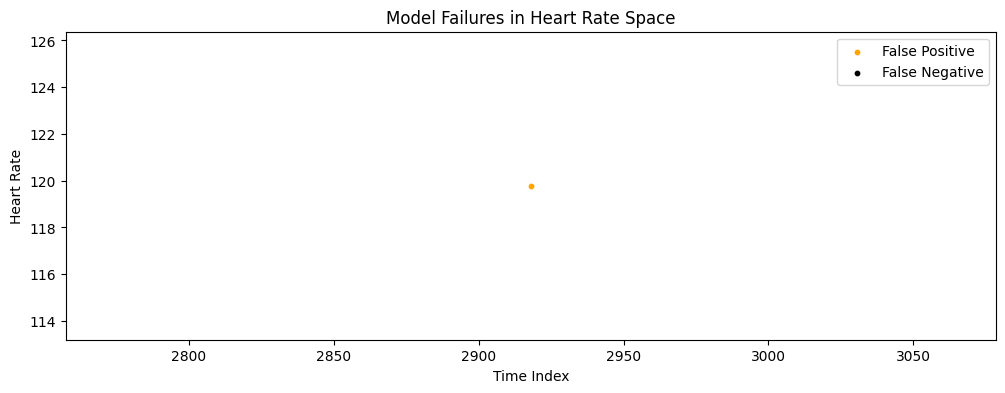

In [18]:
plt.figure(figsize=(12,4))

plt.scatter(false_positives.index,
            false_positives["heart_rate"],
            color="orange", label="False Positive", s=10)

plt.scatter(false_negatives.index,
            false_negatives["heart_rate"],
            color="black", label="False Negative", s=10)

plt.legend()
plt.title("Model Failures in Heart Rate Space")
plt.xlabel("Time Index")
plt.ylabel("Heart Rate")
plt.show()


In [20]:
plt.figure(figsize=(12,4))
plt.plot(data["heart_rate"], label="HR")
plt.scatter(
    data[data["hr_anomaly"]].index,
    data[data["hr_anomaly"]]["heart_rate"],
    color="red",
    s=5,
    label="HR Anomaly"
)
plt.legend()
plt.title("Heart Rate Anomalies (Rolling Z-score)")
plt.show()


NameError: name 'data' is not defined

<Figure size 1200x400 with 0 Axes>